In [1]:
import config
import numpy as np
import pandas as pd

# Baseline: Training datasets and store
- Time 1 (1 day)
- Time 10 (3 days)
- Time 14 (4 days)
- Time 18 (5 days)
- Time 22 (6 days)

In [3]:
import Test_without_Training

if __name__ == "__main__":
    for K in [1, 6, 10, 14, 18, 22, 26, 30, 34]:
        trainer = Test_without_Training.TremorModelTrainer(config, subject="Hunmin")
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../Results/Baseline_results_train_with_{K}data_H.csv')

# 저장해놨어서 데이터 업데이트 전에 한번 돌리면 굳이 안돌려도 됨

Dataset 1/42 - Session Exp_2025-05-27/E8331D05289A/
(8539, 4, 14, 1) (8539,)
Dataset 2/42 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 90.92%
Maximum validation accuracy : 93.02%
Accuracy of test dataset using model V0: 93.0233%
Dataset 3/42 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 79.9604%
Dataset 4/42 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 86.9267%
Dataset 5/42 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/
Accuracy on unseen dataset: 87.0821%
Dataset 6/42 - Session Exp_2025-06-20-v4/E9AD0E7DCC2B/
Accuracy on unseen dataset: 70.7913%
Dataset 7/42 - Session Exp_2025-06-20-v5/E9AD0E7DCC2B/
Accuracy on unseen dataset: 73.6787%
Dataset 8/42 - Session Exp_2025-06-20-v6/E9AD0E7DCC2B/
Accuracy on unseen dataset: 78.9693%
Dataset 9/42 - Session Exp_2025-06-20-v7/E9AD0E7DCC2B/
Accuracy on unseen dataset: 71.7457%
Dataset 10/42 - Session Exp_2025-0

In [4]:
b_path = 'C:/Users/hml76/PycharmProjects/Tremor_project_local/NCI_mindforce'
baseline_K = ['1', '6', '10', '14', '18', '22', '26', '30', '34']
baselines = []

for idx, K in enumerate(baseline_K):
    baselines.append(b_path + f'/github/Results/Baseline_results_train_with_{K}data_H.csv')

SUBJECT = "Hunmin"

# Training from scratch in every data
- Performance should be high
- Objective


Dataset 1/42 - Session Exp_2025-05-27/E8331D05289A/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 88.52%
Maximum validation accuracy : 93.58%

Dataset 2/42 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 85.75%
Maximum validation accuracy : 89.56%

Dataset 3/42 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 86.31%
Maximum validation accuracy : 92.31%

Dataset 4/42 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 83.19%
Maximum validation accuracy : 90.97%

Dataset 5/42 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 86.55%
Maximum validation accu

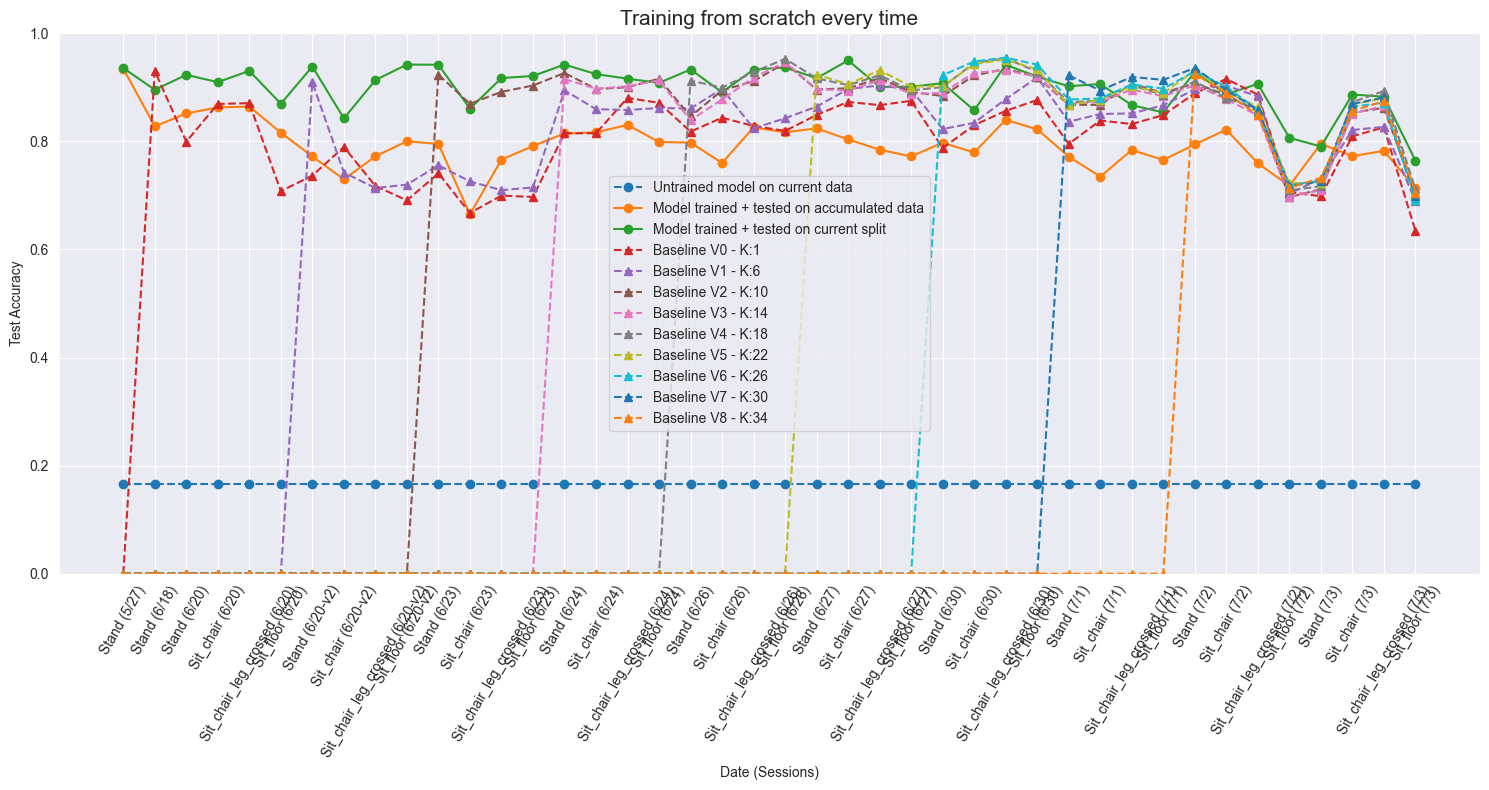

Average of acc without training anything (should be random): 11.13%
Average of acc using previous test data after training: 90.01%
Average of acc using current test data after training: 79.41%
Baseline K-1: 80.75%
Baseline K-6: 82.69%
Baseline K-10: 87.79%
Baseline K-14: 87.31%
Baseline K-18: 88.14%
Baseline K-22: 87.52%
Baseline K-26: 86.81%
Baseline K-30: 85.27%
Baseline K-34: 81.81%


In [5]:
import Training_from_scratch

prog_trainer = Training_from_scratch.ProgressiveTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)
prog_trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")

# Transfer Learning - Incremental : Model is cumulatively updated


Dataset 1/42 - Session Exp_2025-05-27/E8331D05289A/
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 86.48%
Maximum validation accuracy : 93.23%

Dataset 2/42 - Session Exp_2025-06-18/E9AD0E7DCC2B/

Initial Test Accuracy: 84.27%
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 81.65%
Maximum validation accuracy : 84.97%
Accuracy Improvement: 0.70%
	 ===> Positive

Dataset 3/42 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/

Initial Test Accuracy: 82.18%
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 73.75%
Maximum validation accuracy : 81.95%
Accuracy Improvement: -0.23%
	 ===> Negative

Dataset 4/42 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/

Initial Test Accuracy: 87.74%
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 80.31%
Maximum validation accuracy : 88.37%
Accuracy Improvement: 0.63%


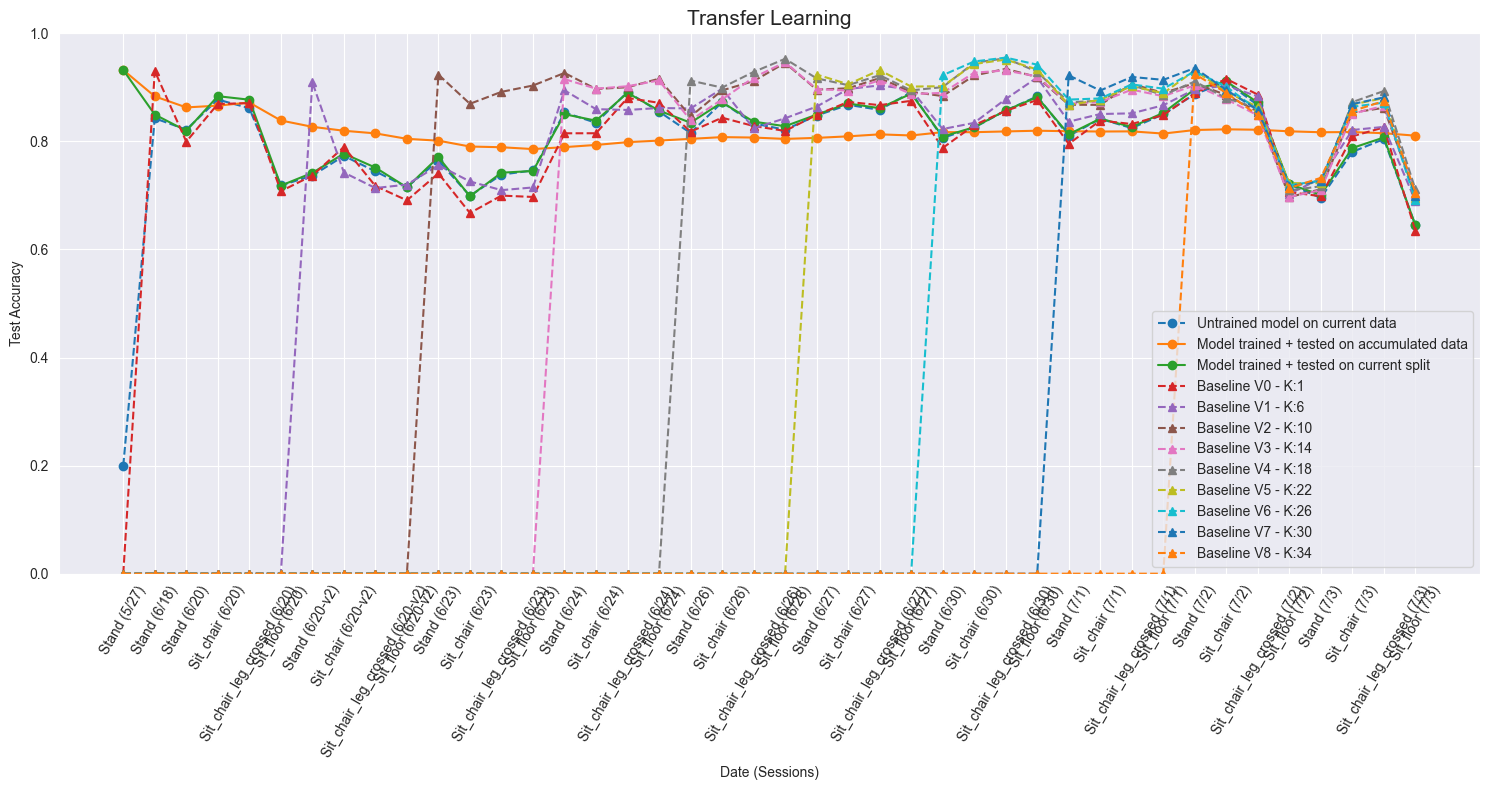

Average of acc without training this data (init; unseen) - incrementally trained model with previous datasets: 79.74%
Average of acc using previous test data after training (with increment): 81.96%
Average of acc using current test data after training (with increment): 81.78%
Baseline K-1: 80.75%
Baseline K-6: 82.69%
Baseline K-10: 87.79%
Baseline K-14: 87.31%
Baseline K-18: 88.14%
Baseline K-22: 87.52%
Baseline K-26: 86.81%
Baseline K-30: 85.27%
Baseline K-34: 81.81%


In [6]:
import Transfer_Learning

tl_trainer = Transfer_Learning.TransferLearningTrainer(config, subject=SUBJECT, increment_true_false="True")
Init_acc_all, Prev_acc_all, Trained_acc_all = tl_trainer.run(plot_learning_curve=False)   #True if want to see convergence for each session round
tl_trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training this data (init; unseen) - incrementally trained model with previous datasets: {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training (with increment): {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training (with increment): {np.mean(x)*100:.2f}%")

for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")

# Few-shot Learning (MAML) adaptation

Dataset 1/42 - Session Exp_2025-05-27/E8331D05289A/
Epoch 1: Loss=1.4010, Acc=0.6500
Epoch 11: Loss=0.9152, Acc=0.6400
Epoch 21: Loss=1.2324, Acc=0.6400
Epoch 31: Loss=1.4914, Acc=0.6600
Epoch 41: Loss=1.6292, Acc=0.6600
Dataset 2/42 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Dataset 3/42 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/
Dataset 4/42 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/
Dataset 5/42 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/
Dataset 6/42 - Session Exp_2025-06-20-v4/E9AD0E7DCC2B/
Dataset 7/42 - Session Exp_2025-06-20-v5/E9AD0E7DCC2B/
Dataset 8/42 - Session Exp_2025-06-20-v6/E9AD0E7DCC2B/
Dataset 9/42 - Session Exp_2025-06-20-v7/E9AD0E7DCC2B/
Dataset 10/42 - Session Exp_2025-06-20-v8/E9AD0E7DCC2B/
Dataset 11/42 - Session Exp_2025-06-23-v1/E9AD0E7DCC2B/
Dataset 12/42 - Session Exp_2025-06-23-v2/E9AD0E7DCC2B/
Dataset 13/42 - Session Exp_2025-06-23-v3/E9AD0E7DCC2B/
Dataset 14/42 - Session Exp_2025-06-23-v4/E9AD0E7DCC2B/
Dataset 15/42 - Session Exp_2025-06-24-v1/E9AD0E7DCC2B/
Datase

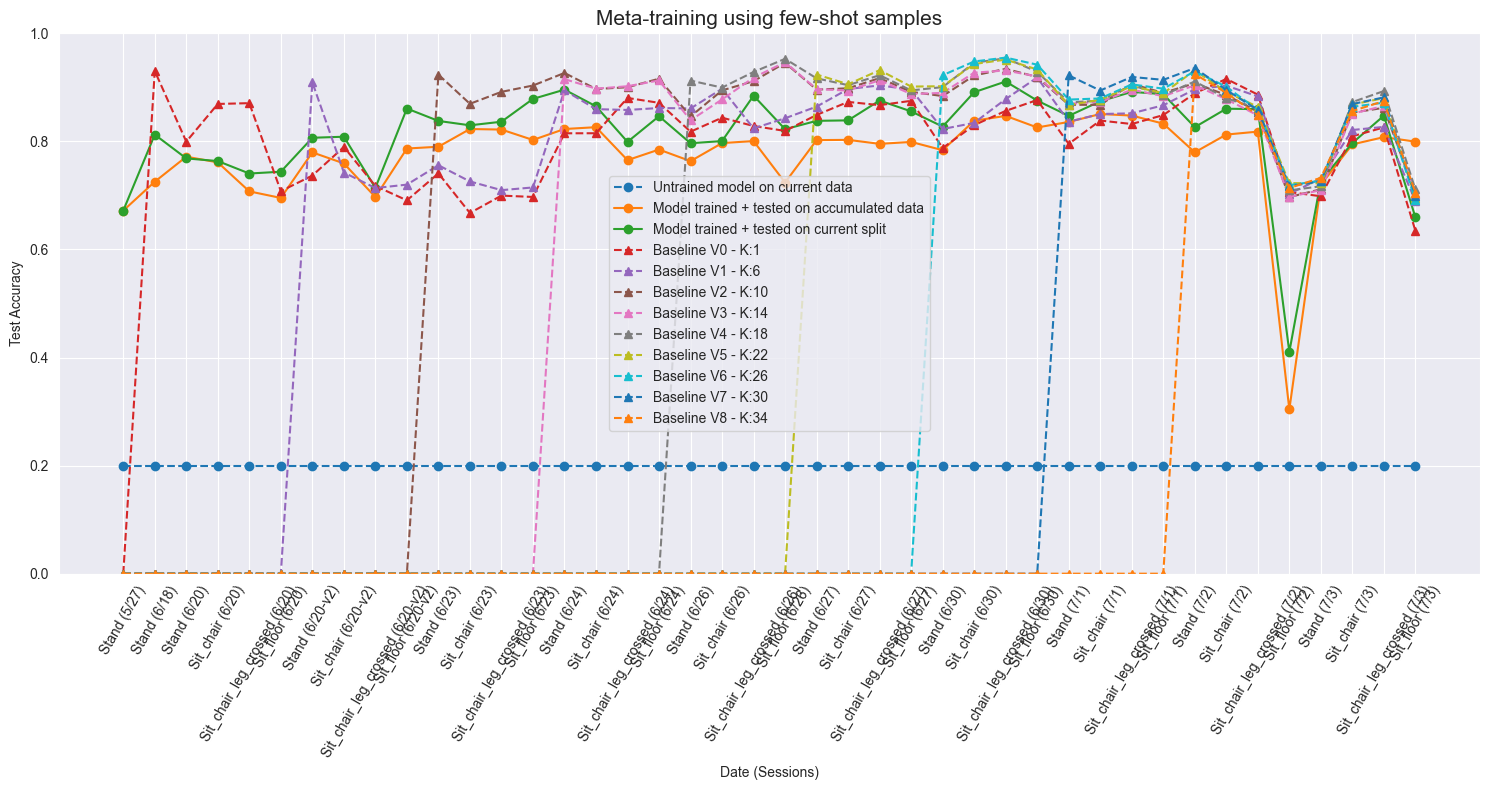

Average of acc without training anything (should be random): 20.00%
Average of acc using previous test data after training: 77.56%
Average of acc using current test data after training: 81.40%
Baseline K-1: 80.75%
Baseline K-6: 82.69%
Baseline K-10: 87.79%
Baseline K-14: 87.31%
Baseline K-18: 88.14%
Baseline K-22: 87.52%
Baseline K-26: 86.81%
Baseline K-30: 85.27%
Baseline K-34: 81.81%


In [7]:
import Few_shot_Learning

trainer = Few_shot_Learning.MAMLProgressiveTrainer(config, subject=SUBJECT, K_shot=10, query_size=100)
Init_acc_all, Prev_acc_all, Trained_acc_all = trainer.run()
trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")

for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")

# Continual Learning (EWC)

Dataset 1/42 - Session Exp_2025-05-27/E8331D05289A/
Start Training (total epochs: 20)...
Finish Training! (Model is saved)
Maximum training accuracy : 83.65%
Maximum validation accuracy : 92.44%
Dataset 2/42 - Session Exp_2025-06-18/E9AD0E7DCC2B/
Dataset 3/42 - Session Exp_2025-06-20-v1/E9AD0E7DCC2B/
Dataset 4/42 - Session Exp_2025-06-20-v2/E9AD0E7DCC2B/
Dataset 5/42 - Session Exp_2025-06-20-v3/E9AD0E7DCC2B/
Dataset 6/42 - Session Exp_2025-06-20-v4/E9AD0E7DCC2B/
Dataset 7/42 - Session Exp_2025-06-20-v5/E9AD0E7DCC2B/
Dataset 8/42 - Session Exp_2025-06-20-v6/E9AD0E7DCC2B/
Dataset 9/42 - Session Exp_2025-06-20-v7/E9AD0E7DCC2B/
Dataset 10/42 - Session Exp_2025-06-20-v8/E9AD0E7DCC2B/
Dataset 11/42 - Session Exp_2025-06-23-v1/E9AD0E7DCC2B/
Dataset 12/42 - Session Exp_2025-06-23-v2/E9AD0E7DCC2B/
Dataset 13/42 - Session Exp_2025-06-23-v3/E9AD0E7DCC2B/
Dataset 14/42 - Session Exp_2025-06-23-v4/E9AD0E7DCC2B/
Dataset 15/42 - Session Exp_2025-06-24-v1/E9AD0E7DCC2B/
Dataset 16/42 - Session Exp_2025

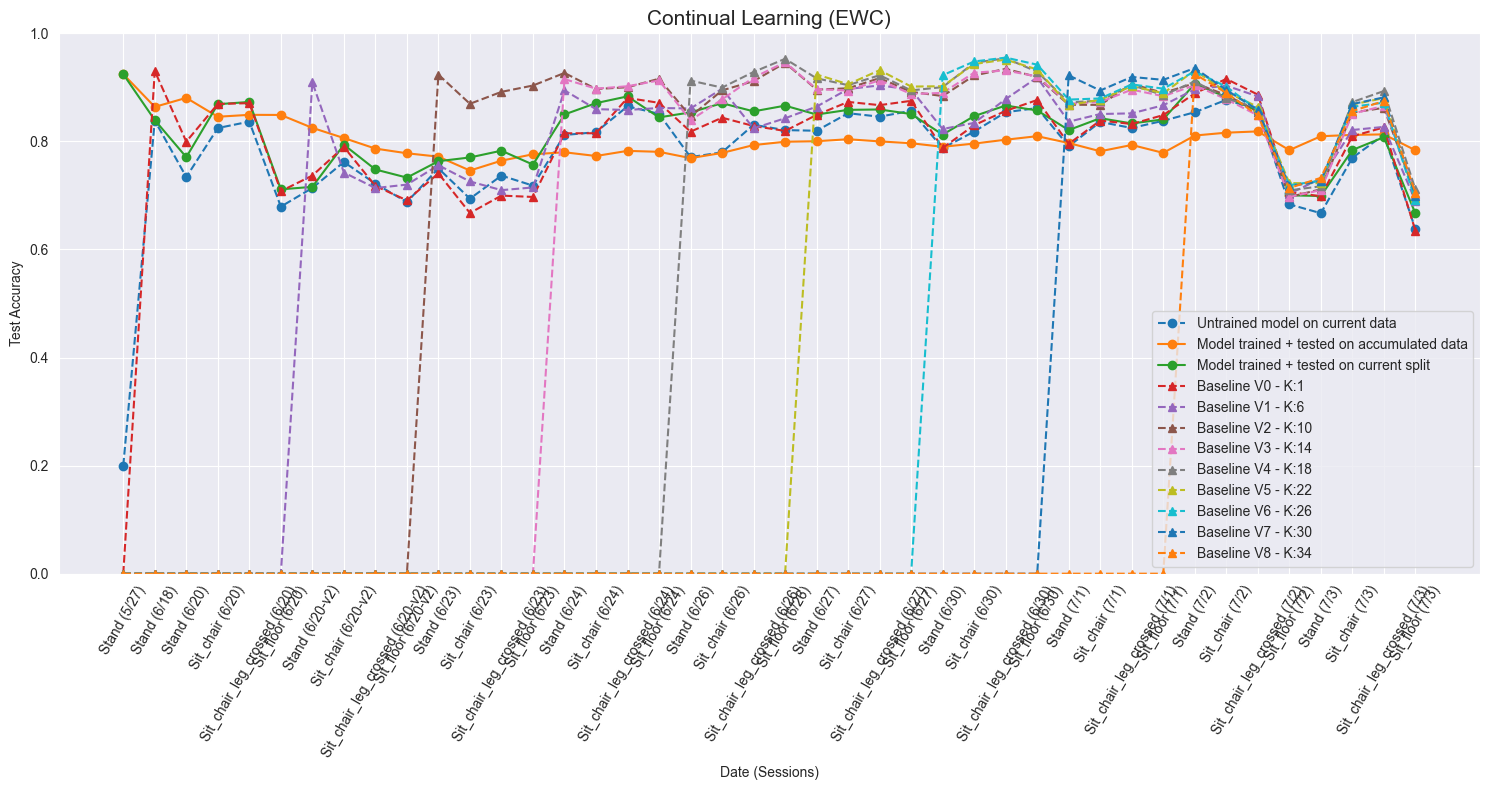

Average of acc without training this data (init; unseen): 77.60%
Average of acc using previous test data after training: 80.29%
Average of acc using current test data after training: 81.88%
Baseline K-1: 80.75%
Baseline K-6: 82.69%
Baseline K-10: 87.79%
Baseline K-14: 87.31%
Baseline K-18: 88.14%
Baseline K-22: 87.52%
Baseline K-26: 86.81%
Baseline K-30: 85.27%
Baseline K-34: 81.81%


In [8]:
import Continual_Learning_EWC_

cl_trainer = Continual_Learning_EWC_.ContinualLearningTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = cl_trainer.run()
cl_trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training this data (init; unseen): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")

for idx, b in enumerate(baselines):
    print(f"Baseline K-{baseline_K[idx]}: {float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):])):.2f}%")